<a href="https://colab.research.google.com/github/HoagMinhTuan/HMT/blob/master/NhanDienHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


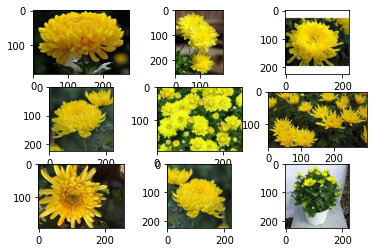

In [27]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder='/content/drive/MyDrive/Colab Notebooks/Hoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'hoacuc.'+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)
plt.show()

In [46]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder='/content/drive/MyDrive/Colab Notebooks/Hoa/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('hoacuc.'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('huongduong.'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc.'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('van tho.'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

(79, 150, 150, 3) (79,)


In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten 

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
 history = model.fit(photos, labels, epochs=30, verbose=1)

Epoch 1/30
3/3 [==============================] - 3s 743ms/step - loss: 779.9008 - accuracy: 0.1266
Epoch 2/30
3/3 [==============================] - 2s 716ms/step - loss: 538.4103 - accuracy: 0.3165
Epoch 3/30
3/3 [==============================] - 2s 697ms/step - loss: 36.0858 - accuracy: 0.5063
Epoch 4/30
3/3 [==============================] - 2s 700ms/step - loss: 6.4973 - accuracy: 0.5190
Epoch 5/30
3/3 [==============================] - 2s 714ms/step - loss: 0.7764 - accuracy: 0.8101
Epoch 6/30
3/3 [==============================] - 2s 699ms/step - loss: 0.2676 - accuracy: 0.9367
Epoch 7/30
3/3 [==============================] - 2s 695ms/step - loss: 0.2275 - accuracy: 0.9367
Epoch 8/30
3/3 [==============================] - 2s 701ms/step - loss: 0.0965 - accuracy: 0.9620
Epoch 9/30
3/3 [==============================] - 2s 711ms/step - loss: 0.1847 - accuracy: 0.9620
Epoch 10/30
3/3 [==============================] - 2s 700ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 11/30
3/

In [49]:
model.evaluate(photos,labels)

3/3 [==============================] - 1s 187ms/step - loss: 2.8821e-07 - accuracy: 1.0000


[2.882144087834604e-07, 1.0]

In [50]:
model.save('Hoa.h5')

In [39]:
classes = ["hoacuc","huongduong","thuocduoc","van tho"]

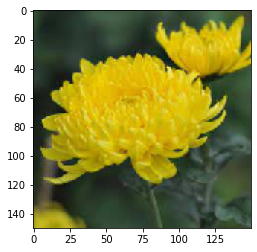

In [52]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('hoacuc.4.jpg', target_size=(150,150))
plt.imshow(img)

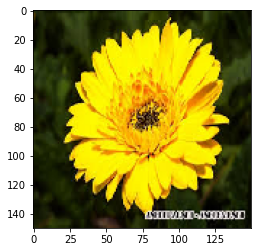

In [58]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('hoacuc.16.jpg', target_size=(150,150))
plt.imshow(img)

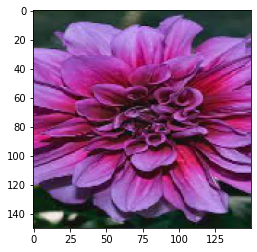

In [60]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('thuocduoc.5.jpg', target_size=(150,150))
plt.imshow(img)

In [61]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.0947658  0.0867048  0.3276969  0.0858504  0.08791155 0.03720972
  0.06922301 0.05454172 0.09109297 0.06500309]]


'thuocduoc'